In [9]:
# settings and modules
%config InlineBackend.figure_format = 'retina'
%pylab inline
from nsaba.nsaba import nsaba
from nsaba.nsaba import visualizer
from nsaba.nsaba import analysis
from nsaba.nsaba import geneinfo


Populating the interactive namespace from numpy and matplotlib


# Nsaba Walkthrough

NSABA (NeuroSynth Allen Brain Atlas) is a python module with a suite of tools for analyzing fMRI meta-analyses from Neurosynth (http://neurosynth.org) and brain-wide, genome-scale human gene experession data from the Allen Brain Institute (http://human.brain-map.org/)

This tool can be used to [estimate gene expression or term association with given coordinates](#Estimation), [visualize relationships between gene expression and term association](#Visualization), and [perform several analyses on these data](#Analysis)

In other words, this tool can ask questions such as, "Is the D2 receptor expressed significantly higher in brain regions that are activated in studies that talk about 'reward'?"
[Moreover, this tool can be used to algorithmically generate novel hypotheses about genes and functional networks](#Scraping)

This notebook will demonstrate some of the functionality of the Nsaba toolbox to explore the relationship between D2 receptors and parts of the brain associated with reward. This is the short demo. For a more in-depth walkthrough, see the Long Demo notebook in this Repo.

### This notebook will demonstrate, in the following order:
* Initializing NSABA
* Visualizing gene and term data
* Estimating gene expression and term association
* Analyzing the relationship between one term and one gene
* Analyzing the relationships between one term and all genes.


## Initializing a Nsaba object

In [7]:
#local paths to data
ns_path = "/Users/Torben/Documents/ABI analysis/current_data_new/"
aba_path = '/Users/Torben/Documents/ABI analysis/normalized_microarray_donor9861/'

#initialization methods
nsaba.Nsaba.ns_load(ns_path)
nsaba.Nsaba.aba_load(aba_path)

#Creating Nsaba object and loading previously estimated gene activation values
N = nsaba.Nsaba()
N.load_ge_pickle(pkl_file='/Users/Torben/Documents/ABI analysis/normalized_microarray_donor9861/Nsaba_ABA_ge.pkl')

# * 'Reward': term used to describe behaviors associated with basal ganglia circuitry
# * entrez ID: 1813 - DRD2, the gene that encodes the D2 dopamine receptor
term1 = 'reward'
genes = [1813 , 6531]
N.estimate_ns_act(term1)

This may take a minute or two ...
database.txt loaded.
features.txt loaded.
Nsaba.ns['mni_coords'] initialized.

This may take a minute or two ...
SampleAnnot.csv loaded.
MicroarrayExpression.csv loaded.
Probes.csv loaded.
Nsaba.aba['mni_coords'] initialized.

This may take a minute or two...
'ge' dictionary successfully loaded


## Quick visualization of the data

gi_tuple(entrez=1813, name='dopamine receptor D2', description="[u'This gene encodes the D2 subtype of the dopamine receptor. This G-protein coupled receptor inhibits adenylyl cyclase activity. A missense mutation in this gene causes myoclonus dystonia; other mutations have been associated with schizophrenia. Alternative splicing of this gene results in two transcript variants encoding different isoforms. A third variant has been described, but it has not been determined whether this form is normal or due to aberrant splicing. [provided by RefSeq, Jul 2008]']") 



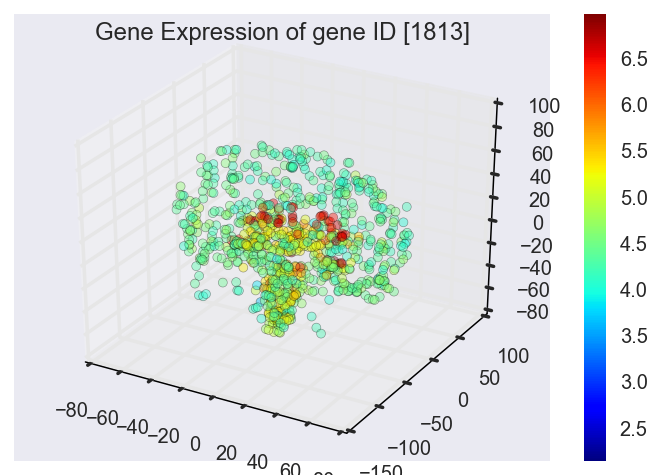

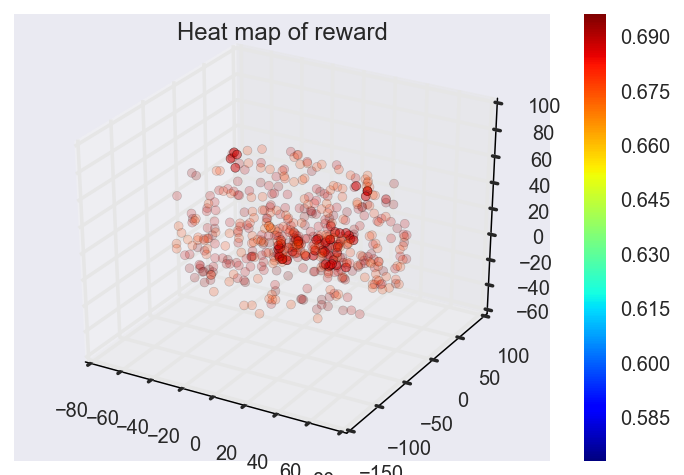

In [10]:
V = visualizer.NsabaVisualizer(N)
V.visualize_ge([genes[0]])
V.visualize_ns('reward',no_ids = 20)

gene_info_output =  geneinfo.get_local_gene_info('/Users/Torben/Code/nsaba/csv/',[genes[0]])
for info in gene_info_output:
    print info,'\n'

## Estimating gene expression and term association at custom coordinates

In [11]:
radius = 10
rnn_args = dict();
rnn_args['radius']= radius

custom_coords = [(-10,20,1),(-4,21,10),(23,11,-6),(10,-20,-3),(-11,8,-20)]
N.estimate_aba_ge(entrez_ids = genes,coords=custom_coords,store_coords=True,z_score=True)

mean_expression_at_coords = N.ge[1813]['mean']['GE']
print 'Estimation of DRD2 gene expression at custom coordinates: '+ str(mean_expression_at_coords)

N.estimate_ns_act(term='reward',coords=custom_coords)
reward_estimation = N.term['reward']['act']
print 'Estimation of reward at custom coordinates: '+ str(reward_estimation)

Estimation of DRD2 gene expression at custom coordinates: [ 3.53186807         nan  1.35455286  0.79049685 -0.39508234]
Estimation of reward at custom coordinates: [ 0.03263459  0.00921588  0.02617497  0.01353743  0.08636711]


### Performing t-test on gene expression of D2 receptor in regions associated with reward and brain regions not associated with reward

This may take a minute or two...
'ge' dictionary successfully loaded
To use inline plotting functionality in Jupyter, '%matplotlib inline' must be enabled
t-value: -6.8151 
p-value: 1.684E-11
Effect size: -0.7421
Control/Functional Split: 846/94



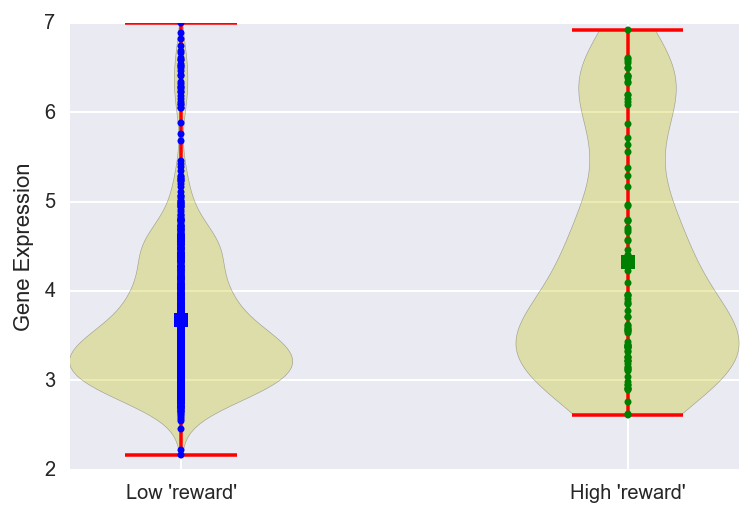

In [15]:
N.load_ge_pickle(pkl_file='/Users/Torben/Documents/ABI analysis/normalized_microarray_donor9861/Nsaba_ABA_ge.pkl')
N.estimate_ns_act('reward')
A = analysis.NsabaAnalysis(N)

A.term_ge_ttest('reward',genes[0],graphops='violin',quant = 90)

### Performing t-tests on gene expression of *all genes* in regions associated with reward and brain regions not associated with reward and plotting their effect size
i.e. the t-test above performed between 'reward' and gene i for all genes. 

This may take a couple of minutes ...


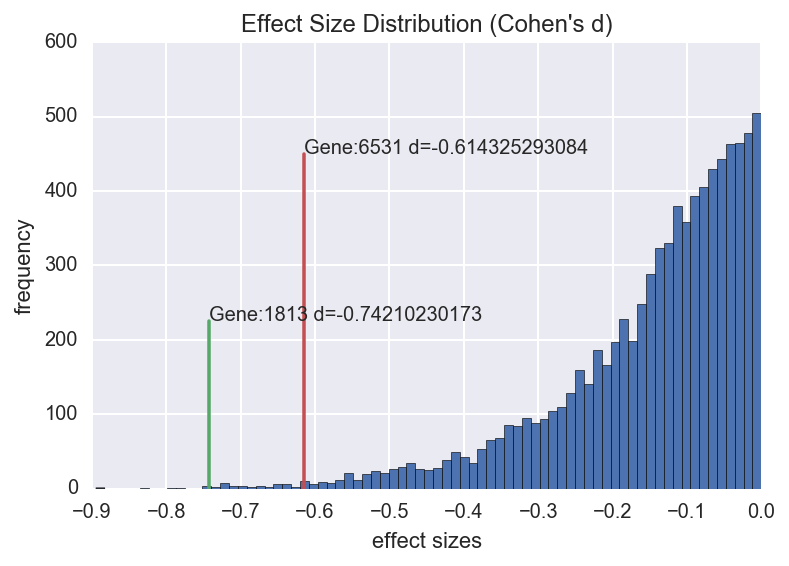

In [16]:
ttest_metrics = A.term_ge_ttest_multi('reward',quant=90)
A.cohen_d_distr(ttest_metrics,genes_of_interest=genes)

<a id="Scraping"></a>
### Querrying the NIH database for information about the top 20 genes that were found associated with reward.



In [7]:
top_genes = A.fetch_gene_descriptions(ttest_metrics,csv_path='/Users/Torben/Code/nsaba/csv/')

Gene 100008589 not found in NIH database
Gene 348807 not found in NIH database
Gene 83550 not found in NIH database
Gene 54874 not found in NIH database
Gene 90293 not found in NIH database
Gene 159686 not found in NIH database
Gene 161582 not found in NIH database
Gene 146754 not found in NIH database
Gene 93556 not found in NIH database
Gene 441054 not found in NIH database
Gene 196996 not found in NIH database
Gene 256815 not found in NIH database
Gene 353134 not found in NIH database

Corrected Bonferroni Alpha: 2.405E-06


3598 (p = 4.688E-13; d = -0.799): [u'The protein encoded by this gene is closely related to Il13RA1, a subuint of the interleukin 13 receptor complex. This protein binds IL13 with high affinity, but lacks cytoplasmic domain, and does not appear to function as a signal mediator. It is reported to play a role in the internalization of IL13. [provided by RefSeq, Jul 2008]']


1814 (p = 1.138E-12; d = -0.786): [u'This gene encodes the D3 subtype of the five (D1-D5) 